In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [53]:
dqn_df = pd.read_csv("./dqn/dqn.csv", nrows=20000)

In [54]:
dqn_df.head()

,episode,score,finish,lose_board,epsilon,learning_rate
0,0,992,lose,"[[2, 4, 8, 2], [4, 16, 128, 4], [2, 8, 16, 8],...",0.9,0.0005
1,1,2332,lose,"[[2, 4, 8, 2], [8, 16, 64, 8], [4, 256, 8, 16]...",0.9,0.0005
2,2,1292,lose,"[[2, 16, 2, 4], [128, 4, 64, 16], [8, 2, 16, 8...",0.9,0.0005
3,3,1696,lose,"[[2, 4, 2, 4], [8, 2, 16, 128], [4, 16, 128, 8...",0.9,0.0005
4,4,948,lose,"[[2, 4, 2, 64], [4, 16, 32, 4], [16, 8, 16, 2]...",0.9,0.0005


In [55]:
def calculate_max_tile(board):
    board_arr = eval(board)
    return max(max(board_arr))

In [56]:
dqn_df['max_tile'] = dqn_df['lose_board'].apply(calculate_max_tile)

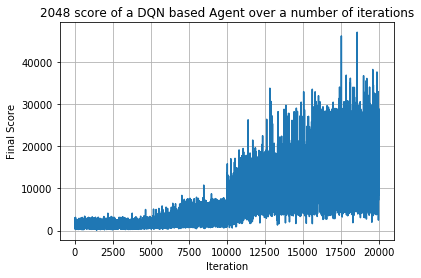

In [27]:
fig, ax = plt.subplots()

ax.plot(dqn_df['episode'], dqn_df['score'])

ax.set(xlabel='Iteration', ylabel='Final Score',
       title='2048 score of a DQN based Agent over a number of iterations')
ax.grid()

# fig.savefig("./dqn/dqn-iteration-score.png")
plt.show()

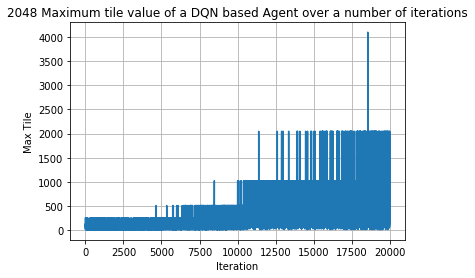

In [28]:
fig, ax = plt.subplots()

ax.plot(dqn_df['episode'], dqn_df['max_tile'])

ax.set(xlabel='Iteration', ylabel='Max Tile',
       title='2048 Maximum tile value of a DQN based Agent over a number of iterations')
ax.grid()

# fig.savefig("./dqn/dqn-max-tile.png")
plt.show()

In [64]:
def get_mean_over_n(x, N):
#     cumsum = np.cumsum(x) 
#     return (cumsum[N:] - cumsum[:-N]) / float(N)
#     return np.convolve(x, np.ones((N,))/N, mode='valid')
    return np.mean(x.values.reshape(-1, N), axis=1)

dqn_mean = pd.DataFrame()
dqn_mean['episode'] = dqn_df[dqn_df.index % 100 == 0]['episode'] + 100
dqn_mean['score'] = get_mean_over_n(dqn_df['score'], 100)
dqn_mean['max_tile'] = get_mean_over_n(dqn_df['max_tile'], 100)

In [65]:
dqn_running_mean

,episode,score,max_tile
0,100,1194.72,72.40
100,200,1181.00,78.00
200,300,1137.36,66.48
300,400,1119.88,64.80
400,500,1194.88,74.08
...,...,...,...
19500,19600,14580.24,555.52
19600,19700,14535.40,616.96
19700,19800,14530.44,515.68
19800,19900,15226.12,588.96


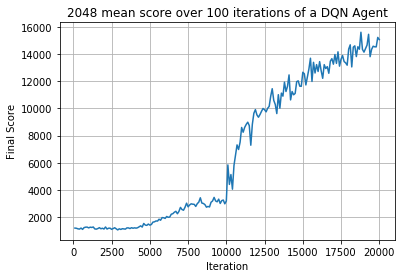

In [66]:
fig, ax = plt.subplots()

ax.plot(dqn_mean['episode'], dqn_mean['score'])

ax.set(xlabel='Iteration', ylabel='Final Score',
       title='2048 mean score over 100 iterations of a DQN Agent')
ax.grid()

fig.savefig("./dqn/dqn-mean-iteration-score.png")
plt.show()

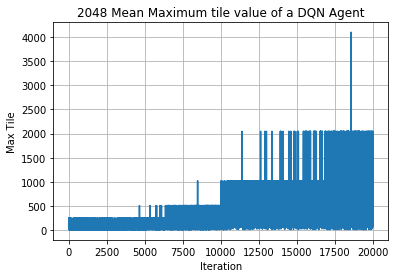

In [67]:
fig, ax = plt.subplots()

ax.plot(dqn_df['episode'], dqn_df['max_tile'])

ax.set(xlabel='Iteration', ylabel='Max Tile',
       title='2048 Mean Maximum tile value of a DQN Agent')
ax.grid()

fig.savefig("./dqn/dqn-mean-max-tile.png")
plt.show()